In [1]:
import pandas as pd
import numpy as np
import MetaTrader5 as mt5
import plotly.express as px
from datetime import datetime
from pylab import mpl, plt
plt.style.use('seaborn')

In [2]:
login = 70267331
server = 'MetaQuotes-Demo'
password = 'orbhvsr8'

In [3]:
mt5.initialize()
mt5.login(login, password, server)

True

In [128]:
symbol = 'GBPUSDm'
timeframe = mt5.TIMEFRAME_H1
start_date = datetime(2022, 1, 1)
end_date = datetime(2022, 12, 31)

In [129]:
raw = pd.DataFrame(mt5.copy_rates_range(symbol, timeframe, start_date, end_date))
raw['time'] = pd.to_datetime(raw['time'], unit='s')
raw.set_index('time', inplace=True)
raw

,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,
2021-12-31 17:00:00,1.35432,1.35460,1.35305,1.35347,1350,8,0
2021-12-31 18:00:00,1.35346,1.35435,1.35294,1.35414,750,8,0
2021-12-31 19:00:00,1.35415,1.35415,1.35269,1.35325,739,8,0
2022-01-02 22:00:00,1.35239,1.35269,1.35217,1.35267,105,91,0
2022-01-02 23:00:00,1.35295,1.35334,1.35199,1.35211,340,12,0
...,...,...,...,...,...,...,...
2022-12-30 13:00:00,1.20324,1.20557,1.20094,1.20520,6460,8,0
2022-12-30 14:00:00,1.20519,1.21073,1.20497,1.20757,10352,8,0
2022-12-30 15:00:00,1.20758,1.20794,1.20153,1.20287,12443,8,0


In [130]:
spread = raw['spread'].mean() * 0.00001
print(spread)

0.00011818210965052903


In [131]:
mean = raw['close'].mean()
print(mean)

1.2367249166399488


In [132]:
ptc = spread / mean
ptc

9.556054710340709e-05

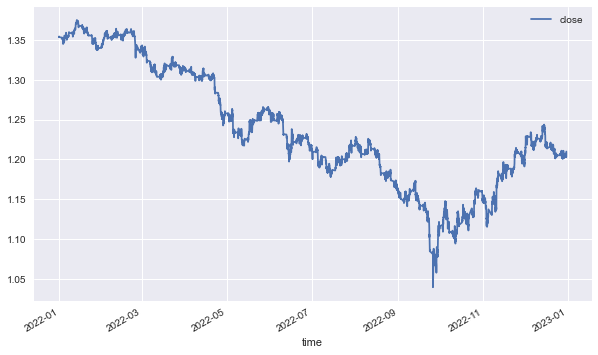

In [133]:
raw['close'].plot(figsize=(10, 6), legend=True);

In [134]:
data = pd.DataFrame(raw['close'])

In [135]:
window = 30

In [136]:
data['return'] = np.log(data['close'] / data['close'].shift(1))
data['vol'] = data['return'].rolling(window).std()
data['mom'] = np.sign(data['return'].rolling(window).mean())
data['sma'] = data['close'].rolling(window).mean()
data['min'] = data['close'].rolling(window).min()
data['max'] = data['close'].rolling(window).max()

In [137]:
data

,close,return,vol,mom,sma,min,max
time,,,,,,,
2021-12-31 17:00:00,1.35347,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-31 18:00:00,1.35414,0.000495,NaN,NaN,NaN,NaN,NaN
2021-12-31 19:00:00,1.35325,-0.000657,NaN,NaN,NaN,NaN,NaN
2022-01-02 22:00:00,1.35267,-0.000429,NaN,NaN,NaN,NaN,NaN
2022-01-02 23:00:00,1.35211,-0.000414,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-12-30 13:00:00,1.20520,0.001644,0.000946,1.0,1.205011,1.20289,1.20710
2022-12-30 14:00:00,1.20757,0.001965,0.001008,1.0,1.205138,1.20289,1.20757
2022-12-30 15:00:00,1.20287,-0.003900,0.001214,-1.0,1.205050,1.20287,1.20757


In [138]:
data.dropna(inplace=True)

In [139]:
lags = 6

In [140]:
features = ['return', 'vol', 'mom', 'sma', 'min', 'max']

In [141]:
cols = []
for f in features:
    for lag in range(1, lags + 1):
        col = f'{f}_lag_{lag}'
        data[col] = data[f].shift(lag) 
        cols.append(col)

In [142]:
data.dropna(inplace=True)
data

,close,return,vol,mom,sma,min,max,return_lag_1,return_lag_2,return_lag_3,...,min_lag_3,min_lag_4,min_lag_5,min_lag_6,max_lag_1,max_lag_2,max_lag_3,max_lag_4,max_lag_5,max_lag_6
time,,,,,,,,,,,,,,,,,,,,,
2022-01-04 07:00:00,1.34873,0.001811,0.000793,-1.0,1.348524,1.34465,1.35222,-0.000386,-0.000074,0.000379,...,1.34465,1.34465,1.34465,1.34465,1.35222,1.35222,1.35222,1.35267,1.35325,1.35414
2022-01-04 08:00:00,1.34911,0.000282,0.000777,-1.0,1.348481,1.34465,1.35222,0.001811,-0.000386,-0.000074,...,1.34465,1.34465,1.34465,1.34465,1.35222,1.35222,1.35222,1.35222,1.35267,1.35325
2022-01-04 09:00:00,1.35114,0.001504,0.000823,1.0,1.348522,1.34465,1.35222,0.000282,0.001811,-0.000386,...,1.34465,1.34465,1.34465,1.34465,1.35222,1.35222,1.35222,1.35222,1.35222,1.35267
2022-01-04 10:00:00,1.35002,-0.000829,0.000838,1.0,1.348529,1.34465,1.35222,0.001504,0.000282,0.001811,...,1.34465,1.34465,1.34465,1.34465,1.35222,1.35222,1.35222,1.35222,1.35222,1.35222
2022-01-04 11:00:00,1.34953,-0.000363,0.000841,-1.0,1.348519,1.34465,1.35222,-0.000829,0.001504,0.000282,...,1.34465,1.34465,1.34465,1.34465,1.35222,1.35222,1.35222,1.35222,1.35222,1.35222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 13:00:00,1.20520,0.001644,0.000946,1.0,1.205011,1.20289,1.20710,-0.000515,-0.000706,0.001312,...,1.20265,1.20265,1.20265,1.20265,1.20710,1.20710,1.20710,1.20710,1.20710,1.20710
2022-12-30 14:00:00,1.20757,0.001965,0.001008,1.0,1.205138,1.20289,1.20757,0.001644,-0.000515,-0.000706,...,1.20265,1.20265,1.20265,1.20265,1.20710,1.20710,1.20710,1.20710,1.20710,1.20710
2022-12-30 15:00:00,1.20287,-0.003900,0.001214,-1.0,1.205050,1.20287,1.20757,0.001965,0.001644,-0.000515,...,1.20289,1.20265,1.20265,1.20265,1.20757,1.20710,1.20710,1.20710,1.20710,1.20710


In [143]:
data['direction'] = np.where(data['return'] > 0, 1, -1)

In [144]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [145]:
n_estimators = 15
random_state = 100
max_depth = 2
min_samples_leaf = 15
subsample = 0.33

In [146]:
dtc = DecisionTreeClassifier(random_state=random_state,
                             max_depth=max_depth,
                             min_samples_leaf=min_samples_leaf)
model = AdaBoostClassifier(base_estimator=dtc,
                           n_estimators=n_estimators,
                           random_state=random_state)

In [147]:
split = int(len(data) * 0.7)
split

4341

In [148]:
train = data.iloc[:split].copy()
train

,close,return,vol,mom,sma,min,max,return_lag_1,return_lag_2,return_lag_3,...,min_lag_4,min_lag_5,min_lag_6,max_lag_1,max_lag_2,max_lag_3,max_lag_4,max_lag_5,max_lag_6,direction
time,,,,,,,,,,,,,,,,,,,,,
2022-01-04 07:00:00,1.34873,0.001811,0.000793,-1.0,1.348524,1.34465,1.35222,-0.000386,-0.000074,0.000379,...,1.34465,1.34465,1.34465,1.35222,1.35222,1.35222,1.35267,1.35325,1.35414,1
2022-01-04 08:00:00,1.34911,0.000282,0.000777,-1.0,1.348481,1.34465,1.35222,0.001811,-0.000386,-0.000074,...,1.34465,1.34465,1.34465,1.35222,1.35222,1.35222,1.35222,1.35267,1.35325,1
2022-01-04 09:00:00,1.35114,0.001504,0.000823,1.0,1.348522,1.34465,1.35222,0.000282,0.001811,-0.000386,...,1.34465,1.34465,1.34465,1.35222,1.35222,1.35222,1.35222,1.35222,1.35267,1
2022-01-04 10:00:00,1.35002,-0.000829,0.000838,1.0,1.348529,1.34465,1.35222,0.001504,0.000282,0.001811,...,1.34465,1.34465,1.34465,1.35222,1.35222,1.35222,1.35222,1.35222,1.35222,-1
2022-01-04 11:00:00,1.34953,-0.000363,0.000841,-1.0,1.348519,1.34465,1.35222,-0.000829,0.001504,0.000282,...,1.34465,1.34465,1.34465,1.35222,1.35222,1.35222,1.35222,1.35222,1.35222,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-13 23:00:00,1.15018,0.001087,0.002934,-1.0,1.162471,1.14893,1.17322,-0.000200,-0.000026,-0.000661,...,1.14995,1.15022,1.15195,1.17322,1.17322,1.17322,1.17322,1.17322,1.17322,1
2022-09-14 00:00:00,1.15018,0.000000,0.002930,-1.0,1.161883,1.14893,1.17322,0.001087,-0.000200,-0.000026,...,1.14919,1.14995,1.15022,1.17322,1.17322,1.17322,1.17322,1.17322,1.17322,-1
2022-09-14 01:00:00,1.15009,-0.000078,0.002930,-1.0,1.161299,1.14893,1.17322,0.000000,0.001087,-0.000200,...,1.14916,1.14919,1.14995,1.17322,1.17322,1.17322,1.17322,1.17322,1.17322,-1


In [149]:
mu, std = train.mean(), train.std()

In [150]:
train_ = (train - mu) / std

In [151]:
model.fit(train_[cols], train['direction'])

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         min_samples_leaf=15,
                                                         random_state=100),
                   n_estimators=15, random_state=100)

In [152]:
accuracy_score(train['direction'], model.predict(train_[cols]))

0.598479612992398

In [153]:
test = data.iloc[split:].copy()
test

,close,return,vol,mom,sma,min,max,return_lag_1,return_lag_2,return_lag_3,...,min_lag_4,min_lag_5,min_lag_6,max_lag_1,max_lag_2,max_lag_3,max_lag_4,max_lag_5,max_lag_6,direction
time,,,,,,,,,,,,,,,,,,,,,
2022-09-14 04:00:00,1.15206,0.001268,0.002947,-1.0,1.159616,1.14893,1.17322,-0.000061,0.000504,-0.000078,...,1.14893,1.14893,1.14893,1.17322,1.17322,1.17322,1.17322,1.17322,1.17322,1
2022-09-14 05:00:00,1.15073,-0.001155,0.002942,-1.0,1.159013,1.14893,1.17322,0.001268,-0.000061,0.000504,...,1.14893,1.14893,1.14893,1.17322,1.17322,1.17322,1.17322,1.17322,1.17322,-1
2022-09-14 06:00:00,1.14841,-0.002018,0.002948,-1.0,1.158310,1.14841,1.17322,-0.001155,0.001268,-0.000061,...,1.14893,1.14893,1.14893,1.17322,1.17322,1.17322,1.17322,1.17322,1.17322,-1
2022-09-14 07:00:00,1.15254,0.003590,0.003045,-1.0,1.157750,1.14841,1.17322,-0.002018,-0.001155,0.001268,...,1.14893,1.14893,1.14893,1.17322,1.17322,1.17322,1.17322,1.17322,1.17322,1
2022-09-14 08:00:00,1.15377,0.001067,0.003058,-1.0,1.157245,1.14841,1.17322,0.003590,-0.002018,-0.001155,...,1.14893,1.14893,1.14893,1.17322,1.17322,1.17322,1.17322,1.17322,1.17322,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 13:00:00,1.20520,0.001644,0.000946,1.0,1.205011,1.20289,1.20710,-0.000515,-0.000706,0.001312,...,1.20265,1.20265,1.20265,1.20710,1.20710,1.20710,1.20710,1.20710,1.20710,1
2022-12-30 14:00:00,1.20757,0.001965,0.001008,1.0,1.205138,1.20289,1.20757,0.001644,-0.000515,-0.000706,...,1.20265,1.20265,1.20265,1.20710,1.20710,1.20710,1.20710,1.20710,1.20710,1
2022-12-30 15:00:00,1.20287,-0.003900,0.001214,-1.0,1.205050,1.20287,1.20757,0.001965,0.001644,-0.000515,...,1.20265,1.20265,1.20265,1.20757,1.20710,1.20710,1.20710,1.20710,1.20710,-1


In [154]:
test_ = (test - mu) / std

In [155]:
test['position'] = model.predict(test_[cols])

In [156]:
accuracy_score(test['direction'], test['position'])

0.5163890381515315

In [157]:
test['strategy'] = test['position'] * test['return']
test

,close,return,vol,mom,sma,min,max,return_lag_1,return_lag_2,return_lag_3,...,min_lag_6,max_lag_1,max_lag_2,max_lag_3,max_lag_4,max_lag_5,max_lag_6,direction,position,strategy
time,,,,,,,,,,,,,,,,,,,,,
2022-09-14 04:00:00,1.15206,0.001268,0.002947,-1.0,1.159616,1.14893,1.17322,-0.000061,0.000504,-0.000078,...,1.14893,1.17322,1.17322,1.17322,1.17322,1.17322,1.17322,1,-1,-0.001268
2022-09-14 05:00:00,1.15073,-0.001155,0.002942,-1.0,1.159013,1.14893,1.17322,0.001268,-0.000061,0.000504,...,1.14893,1.17322,1.17322,1.17322,1.17322,1.17322,1.17322,-1,-1,0.001155
2022-09-14 06:00:00,1.14841,-0.002018,0.002948,-1.0,1.158310,1.14841,1.17322,-0.001155,0.001268,-0.000061,...,1.14893,1.17322,1.17322,1.17322,1.17322,1.17322,1.17322,-1,-1,0.002018
2022-09-14 07:00:00,1.15254,0.003590,0.003045,-1.0,1.157750,1.14841,1.17322,-0.002018,-0.001155,0.001268,...,1.14893,1.17322,1.17322,1.17322,1.17322,1.17322,1.17322,1,-1,-0.003590
2022-09-14 08:00:00,1.15377,0.001067,0.003058,-1.0,1.157245,1.14841,1.17322,0.003590,-0.002018,-0.001155,...,1.14893,1.17322,1.17322,1.17322,1.17322,1.17322,1.17322,1,1,0.001067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 13:00:00,1.20520,0.001644,0.000946,1.0,1.205011,1.20289,1.20710,-0.000515,-0.000706,0.001312,...,1.20265,1.20710,1.20710,1.20710,1.20710,1.20710,1.20710,1,-1,-0.001644
2022-12-30 14:00:00,1.20757,0.001965,0.001008,1.0,1.205138,1.20289,1.20757,0.001644,-0.000515,-0.000706,...,1.20265,1.20710,1.20710,1.20710,1.20710,1.20710,1.20710,1,-1,-0.001965
2022-12-30 15:00:00,1.20287,-0.003900,0.001214,-1.0,1.205050,1.20287,1.20757,0.001965,0.001644,-0.000515,...,1.20265,1.20757,1.20710,1.20710,1.20710,1.20710,1.20710,-1,1,-0.003900


In [158]:
sum(test['position'].diff() != 0)

604

In [159]:
test['strategy_tc'] = np.where(test['position'].diff() != 0,
                               test['strategy'] - ptc,
                               test['strategy'])

In [160]:
test['cstrategy'] = test['strategy'].cumsum().apply(np.exp)
test['creturn'] = test['return'].cumsum().apply(np.exp)
test['cstrategy_tc'] = test['strategy_tc'].cumsum().apply(np.exp)

In [161]:
round(test[['return', 'strategy', 'strategy_tc']].sum().apply(np.exp), 5)

return         1.05145
strategy       0.99597
strategy_tc    0.94011
dtype: float64

<AxesSubplot:xlabel='time'>

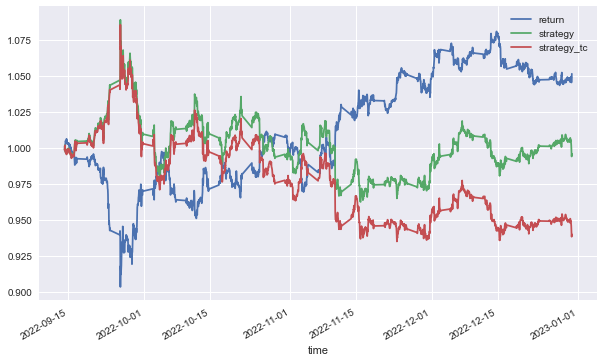

In [163]:
test[['return', 'strategy', 'strategy_tc']].cumsum().apply(np.exp).plot(figsize=(10, 6))